In [67]:
import psi4
import numpy as np

In [37]:
# psi4.core.set_output_file('output.dat', False)

# II. Running a Basic Hartree-Fock Calculation

In [38]:
%%time
#! Sample HF/cc-pVDZ H2O Computation

psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')
psi4.core.set_output_file('output.dat', True)

CPU times: user 360 ms, sys: 24.6 ms, total: 385 ms
Wall time: 390 ms


In [39]:
%%time
#! Sample UHF/6-31G** CH2 Computation
psi4.set_memory('500 MB')
R = 1.075
A = 133.93

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')
psi4.core.set_output_file('output_CH2.dat', True)

CPU times: user 350 ms, sys: 8.76 ms, total: 359 ms
Wall time: 361 ms


# III. Geometry Optimzation and Vibrational Frequency Analysis

In [40]:
%%time
psi4.set_memory('500 MB')
psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)
psi4.core.set_output_file('h2o_opt_output.dat', True)

Optimizer: Optimization complete!
CPU times: user 1.01 s, sys: 35.6 ms, total: 1.04 s
Wall time: 1.05 s


In [41]:
%%time
psi4.set_memory('600 MB')
scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)
psi4.core.set_output_file('h2o_freq_output.dat', True)

CPU times: user 1.14 s, sys: 34.6 ms, total: 1.18 s
Wall time: 1.19 s


In [42]:
print(scf_e)
print(scf_wfn)

-76.02703272937319


# IV. Analysis of Intermolecular Interactions

In [43]:
%%time
# Example SAPT computation for ethene*ethyne (*i.e.*, ethylene*acetylene).
# Test case 16 from S22 Database

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

CPU times: user 1.24 ms, sys: 35 µs, total: 1.28 ms
Wall time: 1.3 ms


In [44]:
%%time
psi4.set_memory('600 MB')
psi4.set_options({'scf_type': 'df',
                  'freeze_core': 'true'})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)
psi4.core.set_output_file('SAPT_output.dat', True)

CPU times: user 4.72 s, sys: 368 ms, total: 5.09 s
Wall time: 5.2 s


# V. Potential Surface Scans and Counterpoise Correction Made Easy

In [52]:
%%time
#! Example potential energy surface scan and CP-correction for Ne2
psi4.set_memory('600 MB')
ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

psi4.core.set_output_file('ne2_output.dat', True)

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            2.5                        0.758605
            3.0                        0.015968
            4.0                        -0.016215
CPU times: user 5.43 s, sys: 1.45 s, total: 6.88 s
Wall time: 7.48 s


# VI. Energy of two argon molecules

In [84]:
%%time
#! Example potential energy surface scan and CP-correction for Ar2
psi4.set_memory('600 MB')
Ar2_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = [3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0]

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    Ar2 = psi4.geometry(Ar2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=Ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

R_data=[]
E_int_data=[]
# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))
    R_data.append(R)
    E_int_data.append(e)
#     R_data=np.append(R_data,{:3.1f})
#     E_int_data=np.append(E_int_data,{:1.6f})
    
psi4.core.set_output_file('Ar2_output.dat', True)

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.169820
            3.8                        -0.069454
            4.0                        -0.122889
            4.2                        -0.116450
            4.5                        -0.095152
            4.8                        -0.073689
            5.0                        -0.055968
            5.2                        -0.042323
            5.5                        -0.032099
            5.8                        -0.024511
            6.0                        -0.018882
CPU times: user 1min 9s, sys: 6.06 s, total: 1min 15s
Wall time: 1min 17s


sigma, eps [3.64339416 0.12032436]


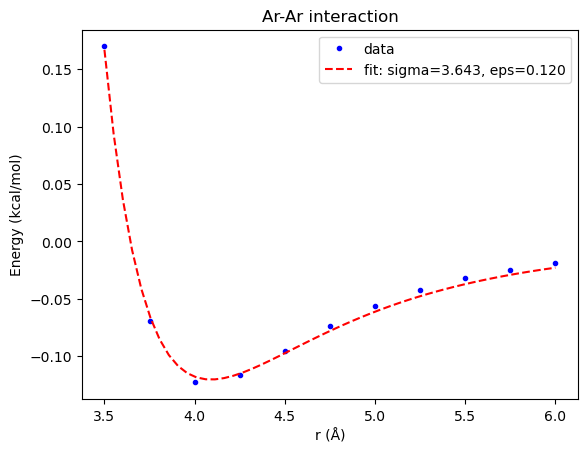

In [86]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def lj(r,sigma,eps):
    return 4*eps*( (sigma/r)**12-(sigma/r)**6  )

xdata=R_data
ydata=E_int_data
plt.plot(xdata, ydata, 'b.', label='data')
popt, pcov = curve_fit(lj, xdata, ydata)
print('sigma, eps',popt)
x2data = np.linspace(3.5, 6, 50)
plt.plot(x2data, lj(x2data, *popt), 'r--', label='fit: sigma=%5.3f, eps=%5.3f' % tuple(popt))
plt.xlabel('r (Å)')
plt.ylabel('Energy (kcal/mol)')
plt.title('Ar-Ar interaction')
plt.legend()
plt.savefig('Ar-Ar interaction.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()